In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Processed Data

In [4]:
df = pd.read_csv('../data/processed/processed_features.csv')
print(f"SHAPE: {df.shape}")
df.head(1)

SHAPE: (75000, 28)


,price,text_len,has_image,value,pack_count,bullet_count,digit_count,caps_ratio,kw_premium,kw_luxury,...,unit_Oz,unit_Unknown,unit_g,unit_ml,unit_nan,total_weight,text_len_x_digit_count,text_len_x_bullet_count,pack_count_x_total_weight,has_bullet
0,1.773256,-0.958958,0.0,0.040063,0.068002,-1.487072,-1.169436,1.022125,-0.437431,-0.057715,...,-0.469241,-0.106556,-0.014144,-0.009661,0.0,1.322003,-1.622613,-1.595362,1.42414,-1.62919


### Correlations

In [8]:
# Identify numeric columns excluding the target variable 'price'
target = 'price'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove(target)

In [9]:
pearson_corr = df[numeric_cols + [target]].corr(method='pearson')[target].sort_values(ascending=False)
print("\n----------------------------------------")
print("Top positive correlations with price (Pearson):")
print("----------------------------------------")
print(pearson_corr.head(10))
print("----------------------------------------")
print("Top negative correlations with price (Pearson):")
print("----------------------------------------")
print(pearson_corr.tail(10))


----------------------------------------
Top positive correlations with price (Pearson):
----------------------------------------
price                      1.000000
text_len                   0.258967
text_len_x_digit_count     0.215734
kw_premium                 0.182913
digit_count                0.172455
unit_Count                 0.152151
text_len_x_bullet_count    0.104399
sentiment_score            0.080706
kw_vegan                   0.077578
bullet_count               0.076601
Name: price, dtype: float64
----------------------------------------
Top negative correlations with price (Pearson):
----------------------------------------
kw_gluten-free    0.017635
unit_L            0.002702
unit_Kg           0.000498
unit_ml          -0.003147
unit_g           -0.003322
unit_Oz          -0.036459
unit_Ounce       -0.097209
caps_ratio       -0.115764
has_image              NaN
unit_nan               NaN
Name: price, dtype: float64


#### Distribution of Top Correlated Features

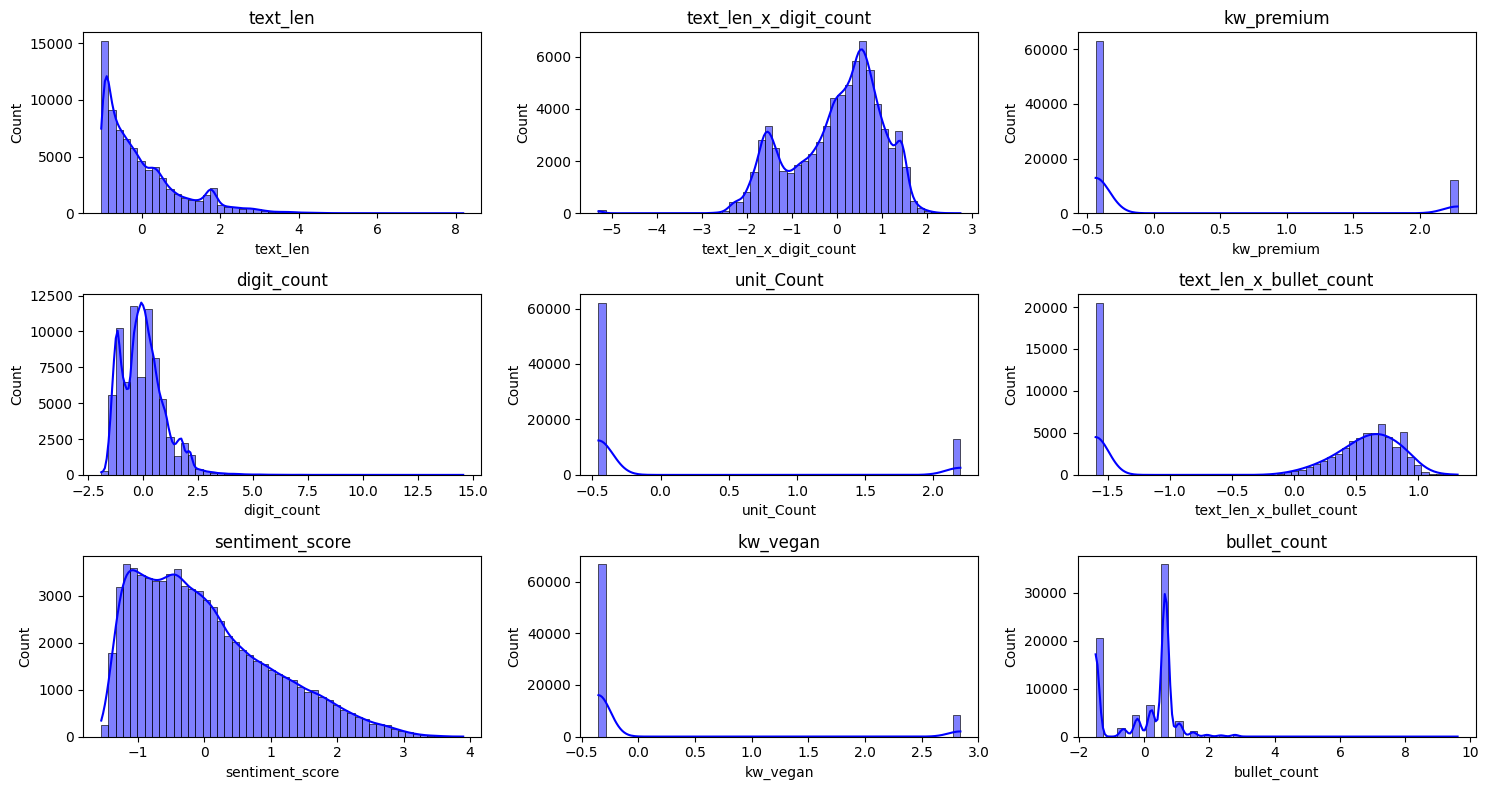

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15,8))
for i, col in enumerate(["text_len", "text_len_x_digit_count", "kw_premium", "digit_count", "unit_Count","text_len_x_bullet_count", "sentiment_score","kw_vegan","bullet_count"]):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

#### Correlation Matrix

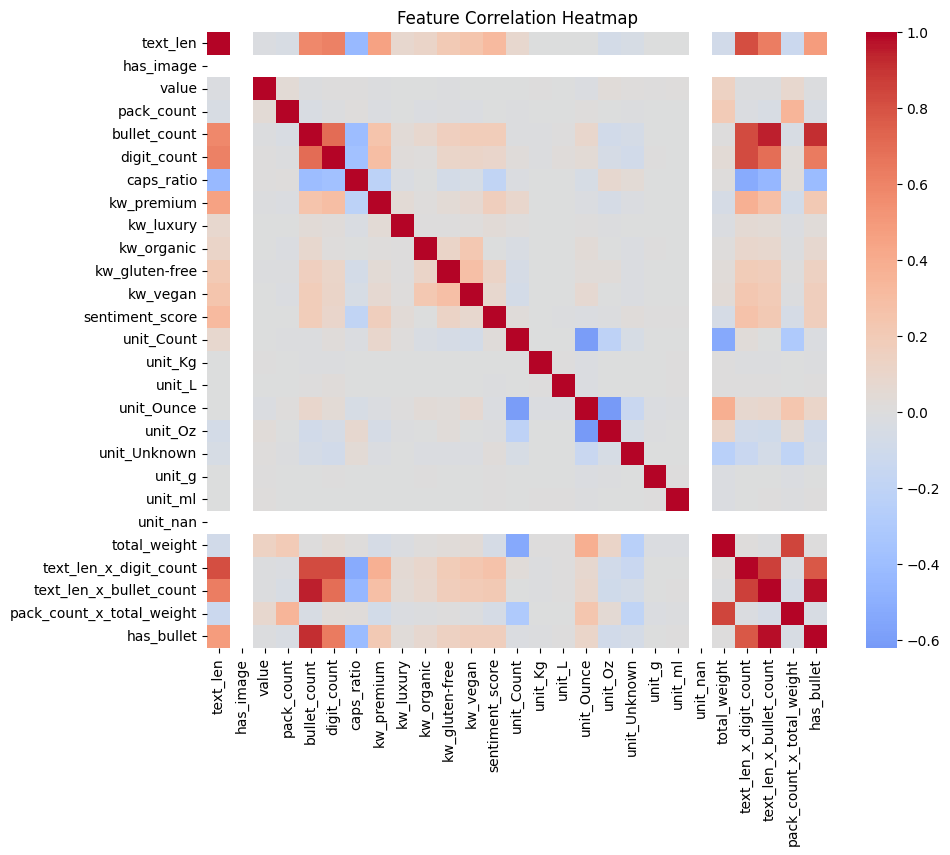

In [16]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()